# **Summary**

* Neural Network Model for diabetes classification task

# **Import necessary packages**

In [ ]:
import numpy as np
import pandas as pd

import keras
from keras import models, layers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# **Import Data**

In [ ]:
#Import data from drive
file_path = '/content/drive/My Drive/Diabetes.csv'
Diabetes = pd.read_csv(file_path)

In [ ]:
#Check dataset columns
Diabetes.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_binary',
       'MenHlth_bins', 'PhysHlth_bins', 'BMI_normalized'],
      dtype='object')

# **Define the training Data**

In [ ]:
# Prepare data for model training
X = Diabetes.drop('Diabetes_binary', axis=1).values
Y = Diabetes['Diabetes_binary'].values

# split data into train/test/validation
X_data, X_test, y_data, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, X_val.shape

((3167, 21), (990, 21), (792, 21))

# **Create a NN model**

In [ ]:
# Define a NN
# Initiate sequential model
nn_model = Sequential()
nn_model.add(Dense(21, input_shape=(21,), activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  #Final layer has only 1 neuron because this is a binary classification

In [ ]:
# Summary of nn model
# 2 dense layers
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                462       
                                                                 
 dense_1 (Dense)             (None, 1)                 22        
                                                                 
Total params: 484 (1.89 KB)
Trainable params: 484 (1.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


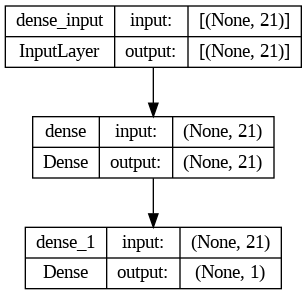

In [ ]:
#Visualization of keras sequential model
keras.utils.plot_model(nn_model,"binary_classifier.png", show_shapes=True) # show_shapes=True

# **Configure the training process**

In [ ]:
# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Train the model**

In [ ]:
# Fit the model with training data and validate the model with validation data
history = nn_model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
99/99 [==============================] - 3s 11ms/step - loss: 1.2503 - accuracy: 0.5456 - val_loss: 0.3688 - val_accuracy: 0.8838
Epoch 2/100
99/99 [==============================] - 1s 6ms/step - loss: 0.3911 - accuracy: 0.8649 - val_loss: 0.3241 - val_accuracy: 0.8826
Epoch 3/100
99/99 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.8642 - val_loss: 0.3100 - val_accuracy: 0.8801
Epoch 4/100
99/99 [==============================] - 1s 6ms/step - loss: 0.3444 - accuracy: 0.8645 - val_loss: 0.3046 - val_accuracy: 0.8788
Epoch 5/100
99/99 [==============================] - 1s 6ms/step - loss: 0.3390 - accuracy: 0.8626 - val_loss: 0.3007 - val_accuracy: 0.8813
Epoch 6/100
99/99 [==============================] - 1s 6ms/step - loss: 0.3354 - accuracy: 0.8658 - val_loss: 0.3024 - val_accuracy: 0.8801
Epoch 7/100
99/99 [==============================] - 1s 7ms/step - loss: 0.3328 - accuracy: 0.8642 - val_loss: 0.2981 - val_accuracy: 0.8763
Epoch 8/100


# **Visualize model performance during the training process**

In [ ]:
def visualize_performance(flag):
  history_dict = history.history
  epochs = range(1, len(history_dict["loss"]) + 1)

  plt.plot(epochs, history_dict[flag], "bo", label="Training "+flag)
  plt.plot(epochs, history_dict["val_"+flag], "b", label="Validation "+flag)
  plt.title("Training and validation "+flag)
  plt.xlabel("Epochs")
  plt.ylabel(flag)
  plt.legend()
  plt.show()

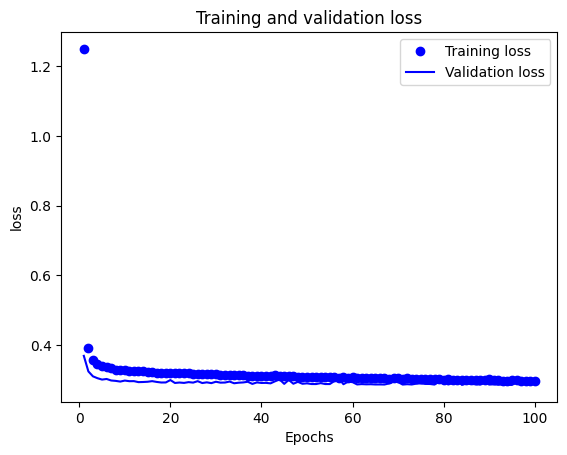

In [ ]:
visualize_performance(flag = "loss")

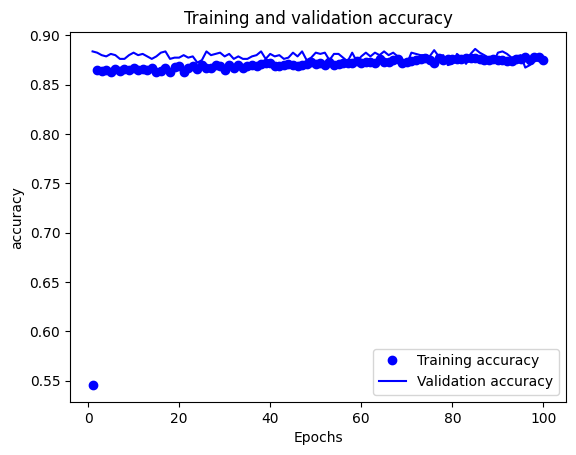

In [ ]:
visualize_performance(flag = "accuracy")

# **Evaluate model performance**

In [ ]:
# evaluate model performance regarding accuracy
test_loss, test_acc = nn_model.evaluate(X_test, y_test)
print(f"test_acc: {np.round(test_acc,3)}")

31/31 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8657
test_acc: 0.866


In [ ]:
# inference
y_pred_prob = nn_model.predict(X_test)
y_pred_labels = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred_labels))

31/31 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       854
           1       0.53      0.20      0.29       136

    accuracy                           0.87       990
   macro avg       0.71      0.59      0.61       990
weighted avg       0.84      0.87      0.84       990



**Discussion**

* This is a quite simple neural network model
* The model was relatively fast to train and fit with training data
* Precision, Recall, and f1-score of **random forest model**: 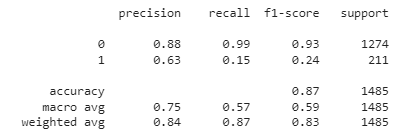
* For **logistic regression**: 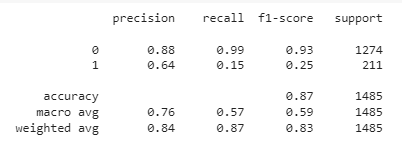


* Overall, all three models have similar performance. However...
* NN model has the lowest precision (0.53) for the positive class compared to random forest model (0.63) and logistic regression (0.64)
* NN model has a slightly better recall (0.20) for the positive class compared to other models (both are 0.15)
* All three models perform poorly with predicting positive class, which mainly due to class imbalance in the dataset.
* According to the loss curve of training and validation data, it shows that the training process has converged.
* I also tried to increase the number of layers, but the performance was lower with multiple hidden layers, which means increasing the model's complexity does not necessarily improve the model. It may due to the nature of the dateset as out of 21 features, 20 are categorical variables.


